# Target Variable

Group 0: "Good" -- The loan is fully paid off ("Fully Paid") Group 1: "Bad" -- The loan is in defaulter ("Default")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# overview of the dataset using panda profile

In [ ]:

'''import pandas_profiling
df=pd.read_csv(r'C:\Users\shree ganesh\Desktop\sanyoja\FINAL PROJECT\Python Project - Bank Lending\XYZCorp_LendingData.txt', delimiter = '\t',low_memory=False)
pandas_profiling.ProfileReport(df)'''

# READ TEXT FILE

In [2]:
df=pd.read_csv(r'C:\Users\shree ganesh\Desktop\sanyoja\FINAL PROJECT\Python Project - Bank Lending\XYZCorp_LendingData.txt', delimiter = '\t',low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   
4         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

In [3]:
df.shape

(855969, 73)

In [4]:
df.describe()


id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]

# to find unique value

In [5]:
#Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes
# Also check if the column is unique
for i in column_names:
    print('{} is unique: {}'.format(i, df[i].is_unique))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

# Data visualization

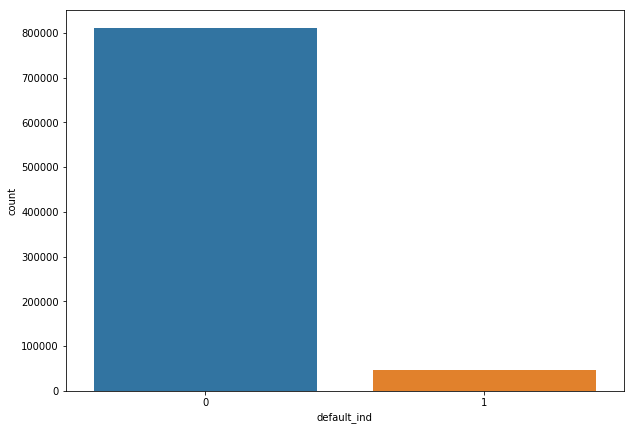

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(10, 7))
sns.countplot(x='default_ind',data=df) 

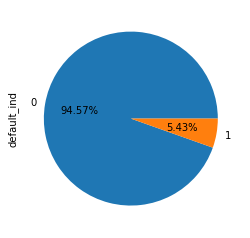

In [7]:
#"Percentage of each Loan status"
df.default_ind.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')

plt.show()

In [8]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [14]:
#Default is the failure to repay a debt including interest or principal on a loan
#lets consider 0--> no defaulter--paid fully
#1--> defaulter-->not paid

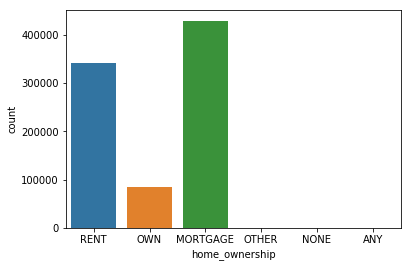

In [9]:
sns.countplot(data=df, x='home_ownership')
plt.show()

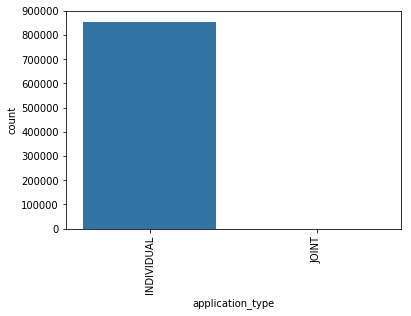

In [10]:
sns.countplot(data=df,x='application_type')
plt.xticks(rotation=90)
plt.show()

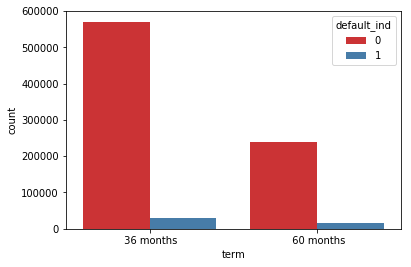

In [11]:
sns.countplot(x='term',hue='default_ind',data=df,palette='Set1')

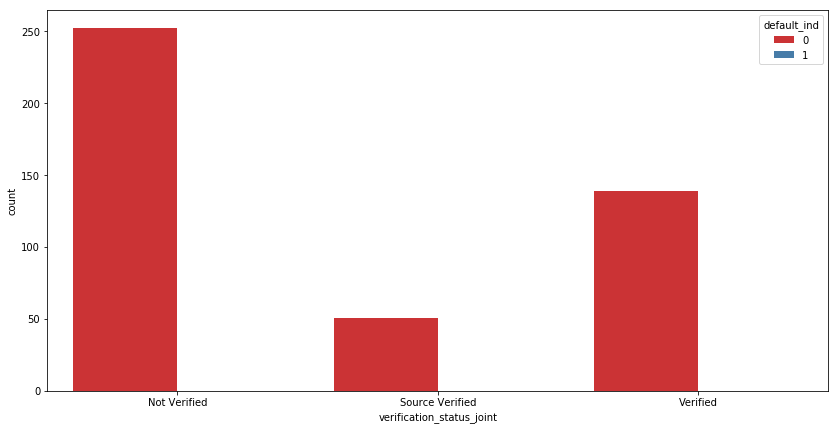

In [12]:
# countplot - x, hue, data
plt.figure(figsize=(14,7))
sns.countplot(x='verification_status_joint',hue='default_ind',data=df,palette='Set1')

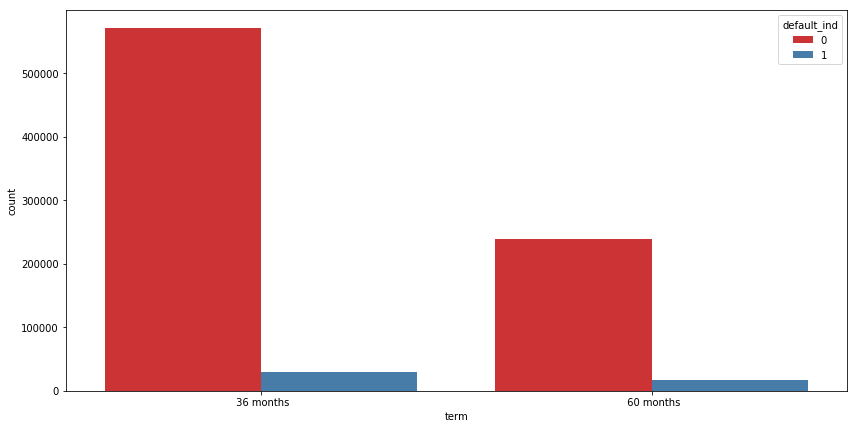

In [13]:
# countplot - x, hue, data
plt.figure(figsize=(14,7))
sns.countplot(x='term',hue='default_ind',data=df,palette='Set1')

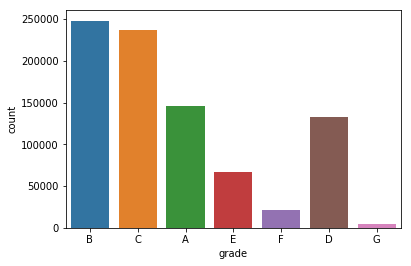

In [14]:
sns.countplot(x='grade',data=df) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

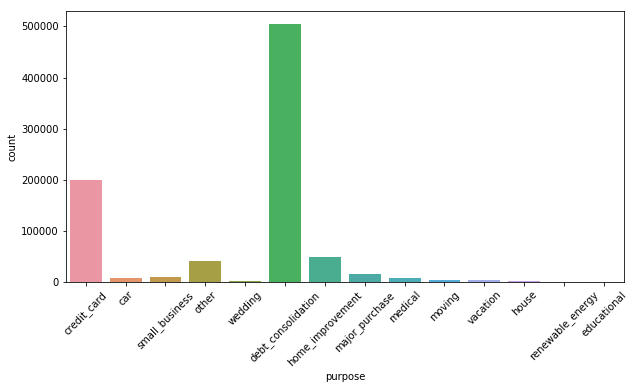

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='purpose',data=df) 
plt.xticks(rotation=45)

# Data cleaning

In [ ]:
#Default is the failure to repay a debt including interest or principal on a loan
#lets consider 0--> no defaulter--paid fully
#1--> defaulter-->not paid

In [ ]:
# to find highly skewed factor 

In [ ]:
# we can remove the id and member_id feature because it does not tell us anything about the person
# The funded_amnt and funded_amnt_inv are both features about the future the loan has been approved at that point and cannot be considered in our model.
# grade and sub_grade are recurring data that we already have with (or a different angle on) the int_rate feature, thus we can dispose of them

In [ ]:
#skewed---acc_now_delinq,annual_inc,collection_recovery_fee,dti,total_rev_hi_lim

In [18]:
#missing--all_util,annual_inc_joint,desc,dti_joint,il_util,inq_fi,inq_last_12m,max_bal_bc,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,total_bal_il,total_cu_tl,verification_status_joint

In [19]:
#correlated--funded_amnt,funded_amnt_inv,installment,member_id,id,out_prncp_inv,policy_code(constant),total_pymnt_inv,total_rec_prncp

In [18]:
#drop 99% missing values n highly corr
df_new=df.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
               'sub_grade','zip_code',
                'out_prncp_inv','total_pymnt','all_util','annual_inc_joint','desc','dti_joint',
                'il_util','inq_fi','inq_last_12m','max_bal_bc',
                'mths_since_last_major_derog','mths_since_last_record',
                'mths_since_rcnt_il','open_acc_6m',
                'open_il_12m','open_il_24m','open_il_6m',
                'open_rv_12m','open_rv_24m','total_bal_il',
                'total_cu_tl','verification_status_joint','addr_state','total_pymnt_inv'],axis =1)

In [19]:
df_new.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [20]:
df_new.shape

(855969, 43)

In [21]:
df1=df_new

In [22]:
df1.shape

(855969, 43)

# MISSING VALUE & DROPPING VARIABLE

In [23]:
df1.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
initial_list_status                0
out_prncp                          0
total_rec_prncp                    0
t

In [24]:
###imputing the missing values
for x in df1.columns[:]:
    if df1[x].dtype=='object':
        df1[x].fillna(df1[x].mode()[0],inplace=True)
    elif df1[x].dtype=='int64' or df1[x].dtype=='float64':
        df1[x].fillna(df1[x].mean(),inplace=True)

In [25]:
df1.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [26]:
print(df1.dtypes.value_counts())

float64    26
object     16
int64       1
dtype: int64


# Data encoding

Some variables are stored as objects. We can’t do numerical analysis on strings, so these will have to be converted to number (specifically float) data types

In [28]:
df1["application_type"].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [29]:
df1["home_ownership"].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [30]:
df1["purpose"].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [31]:
df1["emp_length"].value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [33]:
df1["emp_length"] = df1["emp_length"].replace({
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    })


In [32]:
#Data encoding
df1['grade'] = df['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df1["home_ownership"] = df1["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
df1["application_type"]=df1["application_type"].map({'INDIVIDUAL':0,'JOINT':1})
df1['verification_status'] = df1['verification_status'].map({'Verified':1,'Source Verified':2,'Not Verified':3})
df1["purpose"]=df1["purpose"].map({"debt_consolidation":0,"credit_card":1,"home_improvement":2,
                                  "other":3,"major_purchase":4,"small_business":5,"car":6,"medical":7,
                                 "moving":8,"vacation":9,"house":10,"wedding":11,"renewable_energy":12,
                                  "educational":13})
print("Current shape of dataset :",df1.shape)

Current shape of dataset : (855969, 43)


In [33]:
df1["term"].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [34]:
df1['term'] = df1['term'].apply(lambda s: np.int8(s.split()[0]))#it will remove months----only36

In [35]:
df1["emp_title"].value_counts()#better to remove ths

Teacher                                    62408
Manager                                    10821
Registered Nurse                            5341
RN                                          5182
Owner                                       5157
Supervisor                                  4792
Sales                                       4051
Project Manager                             3856
Driver                                      3417
Office Manager                              3404
Director                                    3067
General Manager                             3060
manager                                     2994
teacher                                     2820
owner                                       2727
Engineer                                    2574
President                                   2478
driver                                      2319
Vice President                              2283
Attorney                                    2074
Operations Manager  

In [36]:
df1=df1.drop(["emp_title"],axis=1)

In [37]:
print("Current shape of dataset :",df1.shape)
df1.head()

Current shape of dataset : (855969, 42)


loan_amnt  term  int_rate  installment  grade emp_length  home_ownership  \
0     5000.0    36     10.65       162.87      6  10+ years               5   
1     2500.0    60     15.27        59.83      5   < 1 year               5   
2     2400.0    36     15.96        84.33      5  10+ years               5   
3    10000.0    36     13.49       339.31      5  10+ years               5   
4     3000.0    60     12.69        67.79      6     1 year               5   

   annual_inc  verification_status   issue_d  ... next_pymnt_d  \
0     24000.0                    1  Dec-2011  ...     Feb-2016   
1     30000.0                    2  Dec-2011  ...     Feb-2016   
2     12252.0                    3  Dec-2011  ...     Feb-2016   
3     49200.0                    2  Dec-2011  ...     Feb-2016   
4     80000.0                    2  Dec-2011  ...     Feb-2016   

   last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0            Jan-2016                        0.0          1.0   
1            Sep-2013                        0.0          1.0   
2            Jan-2016                        0.0          1.0   
3            Jan-2015                        0.0          1.0   
4            Jan-2016                        0.0          1.0   

   application_type acc_now_delinq  tot_coll_amt    tot_cur_bal  \
0                 0            0.0    225.412882  139766.247529   
1                 0            0.0    225.412882  139766.247529   
2                 0            0.0    225.412882  139766.247529   
3                 0            0.0    225.412882  139766.247529   
4                 0            0.0    225.412882  139766.247529   

   total_rev_hi_lim  default_ind  
0      32163.574526            0  
1      32163.574526            1  
2      32163.574526            0  
3      32163.574526            0  
4      32163.574526            0  

[5 rows x 42 columns]

In [38]:
df1['issue_d'] = pd.to_datetime(df['issue_d'])


In [39]:
df1['issue_d'].describe()


count                  855969
unique                    103
top       2015-10-01 00:00:00
freq                    48212
first     2007-06-01 00:00:00
last      2015-12-01 00:00:00
Name: issue_d, dtype: object

Text(0.5, 1.0, 'Loans funded per Year')

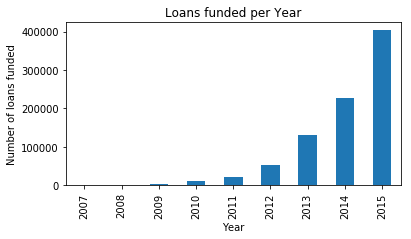

In [40]:
plt.figure(figsize=(6,3))
df1['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of loans funded')
plt.title('Loans funded per Year')

In [41]:
df2=df1

In [42]:
df2.dtypes

loan_amnt                            float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                  int64
emp_length                            object
home_ownership                         int64
annual_inc                           float64
verification_status                    int64
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                                int64
title                                 object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line                      object
inq_last_6mths                       float64
mths_since_last_delinq               float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc 

# Data preprocessing

In [43]:
colname=[]
for x in df2.columns[:]:
    if df2[x].dtype=='object':
        colname.append(x)
colname

['emp_length',
 'pymnt_plan',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [44]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for x in colname:
    df2[x]=le.fit_transform(df2[x])

In [45]:
df2.keys()

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [46]:
df2.head()

loan_amnt  term  int_rate  installment  grade  emp_length  home_ownership  \
0     5000.0    36     10.65       162.87      6           1               5   
1     2500.0    60     15.27        59.83      5          10               5   
2     2400.0    36     15.96        84.33      5           1               5   
3    10000.0    36     13.49       339.31      5           1               5   
4     3000.0    60     12.69        67.79      6           0               5   

   annual_inc  verification_status    issue_d  ...  next_pymnt_d  \
0     24000.0                    1 2011-12-01  ...             0   
1     30000.0                    2 2011-12-01  ...             0   
2     12252.0                    3 2011-12-01  ...             0   
3     49200.0                    2 2011-12-01  ...             0   
4     80000.0                    2 2011-12-01  ...             0   

   last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0                  41                         0.0          1.0   
1                  99                         0.0          1.0   
2                  41                         0.0          1.0   
3                  40                         0.0          1.0   
4                  41                         0.0          1.0   

   application_type  acc_now_delinq  tot_coll_amt    tot_cur_bal  \
0                 0             0.0    225.412882  139766.247529   
1                 0             0.0    225.412882  139766.247529   
2                 0             0.0    225.412882  139766.247529   
3                 0             0.0    225.412882  139766.247529   
4                 0             0.0    225.412882  139766.247529   

   total_rev_hi_lim  default_ind  
0      32163.574526            0  
1      32163.574526            1  
2      32163.574526            0  
3      32163.574526            0  
4      32163.574526            0  

[5 rows x 42 columns]

# Spliting the training and testing data

In [47]:

test_months = ['Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015']

train = df2.loc [ -df1.issue_d.isin(test_months) ]
test = df2.loc [ df1.issue_d.isin(test_months) ]

In [48]:
print('Number of loans in the partition:   ', train.shape[0] + test.shape[0])
print('Number of loans in the full dataset:', df2.shape[0])



Number of loans in the partition:    855969
Number of loans in the full dataset: 855969


TEST & TRAIN

In [49]:
train.drop('issue_d', axis=1, inplace=True)
test.drop('issue_d', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
X_train=train.values[:,1:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)

X_test=test.values[:,1:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)

# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
#When we have our training and testing separate we always put our scalar on training data and the same scales are used to
#transform to both training and testing data
scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)



In [52]:
print(X_train)

[[-6.34014251e-01 -6.56815116e-01 -1.11856912e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 [ 1.57725161e+00  4.00161631e-01 -1.54278970e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 [-6.34014251e-01  5.58021795e-01 -1.44192204e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 ...
 [ 1.57725161e+00  5.64885280e-01 -4.87837436e-01 ... -1.76378776e-02
  -7.29853126e-01 -3.85913557e-01]
 [ 1.57725161e+00  1.48001666e+00 -4.80467921e-01 ... -1.76378776e-02
  -5.61200123e-01 -1.23366454e-01]
 [-6.34014251e-01 -3.50246103e-01  9.45430328e-01 ... -1.76378776e-02
  -7.35913223e-01  3.05460480e-01]]


# Model Building

LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression
#create the  model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))
 
print(classifier.coef_)
print(classifier.intercept_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

[-4.33667856]


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classifiaction report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[256594     86]
 [    68    243]]
classifiaction report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.74      0.78      0.76       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.87      0.89      0.88    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9994007572249611


Type 2 error shold be low as it is harmful.type 1 error is accepteble

# With different threshold value

In [55]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.99939680e-01 6.03195829e-05]
 [9.99365900e-01 6.34099952e-04]
 [9.85209718e-01 1.47902818e-02]
 ...
 [9.88797185e-01 1.12028145e-02]
 [9.99902059e-01 9.79414333e-05]
 [9.99999956e-01 4.35709604e-08]]


In [56]:
for a in np.arange(0,1,0.01):
    
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 error : 0  , type 1 error: 256680
Errors at threshold  0.01 : 63574  , type 2 error : 38  , type 1 error: 63536
Errors at threshold  0.02 : 16070  , type 2 error : 59  , type 1 error: 16011
Errors at threshold  0.03 : 4356  , type 2 error : 60  , type 1 error: 4296
Errors at threshold  0.04 : 2223  , type 2 error : 61  , type 1 error: 2162
Errors at threshold  0.05 : 1545  , type 2 error : 61  , type 1 error: 1484
Errors at threshold  0.06 : 1166  , type 2 error : 61  , type 1 error: 1105
Errors at threshold  0.07 : 934  , type 2 error : 61  , type 1 error: 873
Errors at threshold  0.08 : 784  , type 2 error : 62  , type 1 error: 722
Errors at threshold  0.09 : 673  , type 2 error : 63  , type 1 error: 610
Errors at threshold  0.1 : 583  , type 2 error : 63  , type 1 error: 520
Errors at threshold  0.11 : 529  , type 2 error : 63  , type 1 error: 466
Errors at threshold  0.12 : 479  , type 2 error : 63  , type 1 error: 416
Errors at threshold

 so we can go with 0.5 threshold
 
# logistic regression with modified threshold

In [57]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.53:
        y_pred_class.append(1)
    else:
         y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
print("classifiaction report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:",acc)

[[256595     85]
 [    68    243]]
classifiaction report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.74      0.78      0.76       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.87      0.89      0.88    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9994046484118121


# Receiver Operating Characteristic

In [60]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.99939680e-01 6.03195829e-05]
 [9.99365900e-01 6.34099952e-04]
 [9.85209718e-01 1.47902818e-02]
 ...
 [9.88797185e-01 1.12028145e-02]
 [9.99902059e-01 9.79414333e-05]
 [9.99999956e-01 4.35709604e-08]]


In [73]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8905096653433129
[0.00000000e+00 3.31151628e-04 1.00000000e+00]
[0.         0.78135048 1.        ]


In [71]:
##to calculate by system
fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.9065310216481843


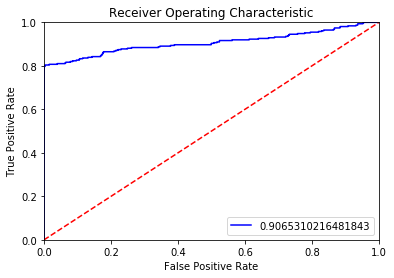

In [69]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
#by taking threshold 

# Cross Validation to check overfitting/underfitting

In [74]:
classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=5, random_state=None, shuffle=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.99144379 0.99131023 0.99618518 0.99613506 0.99700321]
0.9944154949051353


In [75]:
for train_value, test_value in kfold_cv.split(X_train):
    
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classifiaction report:")

print(classification_report(Y_test,Y_pred))

accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",accuracy)
    

[[256559    121]
 [    66    245]]
classifiaction report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.67      0.79      0.72       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.83      0.89      0.86    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9992723480588814


# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,min_samples_leaf=5,max_depth=10)##crerion=''

#fit the modl on the data predit the values
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [78]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[0 0 0 ... 0 0 0]


In [79]:
##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)


[[256679      1]
 [    10    301]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

accuracy report: 0.9999571969446401


In [80]:
print(list(zip(colname,model_DecisionTree.feature_importances_)))

[('emp_length', 0.0), ('pymnt_plan', 0.0003424666197826625), ('title', 0.1886604977771919), ('earliest_cr_line', 3.758745361944513e-05), ('initial_list_status', 9.027318451079134e-10), ('last_pymnt_d', 0.0), ('next_pymnt_d', 4.3712142968302884e-05), ('last_credit_pull_d', 0.0)]


[('emp_length', 0.0), ('pymnt_plan', 0.0003424666197826625), ('title', 0.1886604977771919), ('earliest_cr_line', 3.758745361944513e-05), ('initial_list_status', 9.027318451079134e-10), ('last_pymnt_d', 0.0), ('next_pymnt_d', 4.3712142968302884e-05), ('last_credit_pull_d', 0.0)]


AttributeError: 'dict' object has no attribute 'lower'

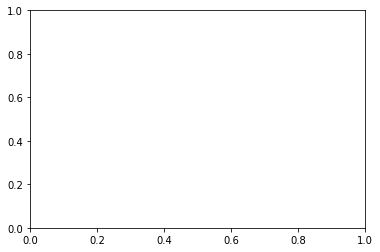

In [85]:
#print(list(zip(colname,model_DecisionTree.feature_importances_)))

#to try in Tableau

SVM MODEL

In [ ]:
'''#from sklearn import svm
#classifier=svm.SVC(kernel='rbf', C=1.0,gamma=0.1)
#fitting traning  data to model
#classifier.fit(X_train,Y_train)
#Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))'''

BAGGING CLASSIFIER (((EXTRA TREE)))

In [ ]:
'''#predicting using the Bagging_Classifier

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(50,random_state=10)
#fit the model on the dataand predict the values
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)'''

In [ ]:
'''##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)'''


RANDOM FOREST CLASSIFIER

In [86]:
#predicting using the bagging_classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(100,random_state=10)
#fit the model on the dataand predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [87]:
##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)


[[239336  17344]
 [     1    310]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    256680
           1       0.02      1.00      0.03       311

   micro avg       0.93      0.93      0.93    256991
   macro avg       0.51      0.96      0.50    256991
weighted avg       1.00      0.93      0.96    256991

accuracy report: 0.9325073640711153


ADABOOST CLASSIFIER

In [88]:
##adaboost

from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                 n_estimators=50,
                                 random_state=10)
#fit the model on tha data and predict values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

In [89]:
##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)


[[250602   6078]
 [     9    302]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

   micro avg       0.98      0.98      0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

accuracy report: 0.9763143456385632


GRADIANT BOOSTING

In [90]:
#predicting with gradiant_boosting_classifier

from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,
                                                  random_state=10)
#fit the model on tha data and predict values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [91]:
##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)


[[256627     53]
 [    10    301]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.97      0.91       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.93      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

accuracy report: 0.9997548552283932


ENSEMBLE MODEL

In [ ]:
#### ensemble model #####

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

 

# create the sub models
estimators = []
#model1 = LogisticRegression()                     ###logistic impacts the model
#estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=70,gamma=0.1)
estimators.append(('svm', model3))
#model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#estimators.append(('knn', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

In [ ]:
##confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy report:",acc)


PREDICTING PROBABILTY ACCURACY SCORE

In [75]:
# store the predict probilities
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba)

[[9.99943799e-01 5.62005706e-05]
 [9.99337018e-01 6.62981704e-04]
 [9.85017575e-01 1.49824251e-02]
 ...
 [9.89194092e-01 1.08059078e-02]
 [9.99902306e-01 9.76940749e-05]
 [9.99999955e-01 4.52147442e-08]]


In [76]:
y_pred_new=[]
for value in y_pred_proba[:,1]:
    if value > 0.46:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
print(y_pred_new)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [77]:
acc=accuracy_score(Y_test,y_pred_new)
print("accuracy report:",acc)

accuracy report: 0.9993774101038557


# Feature Importance

In [100]:
'''# fit RF to plot feature importances
rf_clf.fit(RobustScaler().fit_transform(
  Imputer(strategy="median").fit_transform(X_train)), y_train)

# Plot features importance
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 25), importances[indices], align="center")
plt.xticks(range(1, 25),
           df.columns[df.columns != "not_fully_paid"][indices],
           rotation=90)
plt.title("Feature Importance", {"fontsize": 16});'''

Pandas Profiling. Generates profile reports from a pandas DataFrame . The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis

In [3]:
import pandas_profiling
df=pd.read_csv(r'C:\Users\shree ganesh\Desktop\sanyoja\FINAL PROJECT\Python Project - Bank Lending\XYZCorp_LendingData.txt', delimiter = '\t',low_memory=False)
pandas_profiling.ProfileReport(df)